In [15]:
from bs4 import BeautifulSoup
import requests

In [16]:
url="https://jf8q26wwud-dsn.algolia.net/1/indexes/*/queries?x-algolia-agent=Algolia%20for%20JavaScript%20(3.35.1)%3B%20Browser&x-algolia-application-id=JF8Q26WWUD&x-algolia-api-key=2bc790c0d4f44db9ab6267a597d17f1a"

payload={"requests":[{"indexName":"vnw_job_v2","params":"query=&query=&facetFilters=%5B%5D&numericFilters=%5B%5D&page=0&hitsPerPage=50&restrictSearchableAttributes=%5B%22jobTitle%22%2C%22skills%22%2C%22company%22%5D&attributesToRetrieve=%5B%22*%22%2C%22-jobRequirement%22%2C%22-jobDescription%22%5D"}]}

In [17]:
import json
r = requests.post(url, data=json.dumps(payload))
print(r.json())

{'results': [{'hits': [{'benefits': [{'benefitIconName': 'fa-dollar', 'benefitName': 'Bonus', 'benefitValue': 'Lương cạnh tranh tương xứng với năng lực và kinh nghiệm', 'benefitId': 1}, {'benefitIconName': 'fa-cab', 'benefitName': 'Transportation', 'benefitValue': 'Phụ cấp tiền ăn, điện thoại, xăng xe', 'benefitId': 11}, {'benefitIconName': 'fa-user-md', 'benefitName': 'Healthcare Plan', 'benefitValue': 'Đóng BHYT, BHXH theo quy định của Nhà Nước', 'benefitId': 2}], 'expiredDate': 1584205199, 'visibilityDisplay': 0, 'jobTitle': 'Nhân Viên Triển Khai Dự Án', 'classifiedConfidenceRoles': [], 'categoryVIs': ['Xây dựng', 'Hoạch định/Dự án', 'Điện/Điện tử'], 'priorityOrder': 1581586604, 'salaryMax': 640, 'skills': ['Thiết Bị Điện', 'Hồ Sơ Đấu Thầu', 'Kỹ Thuật Điện', 'Triển Khai Dự Án', 'Soạn Thảo Hợp Đồng'], 'isSalaryVisible': True, 'isShowLogoInSearchResult': True, 'isShowLogo': True, 'jobLevelVI': 'Nhân viên', 'isPriorityJob': False, 'alias': 'nhan-vien-trien-khai-du-an-7', 'company': 'Cô

In [18]:
r.json()["results"][0]["nbHits"]

11501

'<!DOCTYPE html>\n<html lang="vi">\n <head>\n  <meta charset="utf-8"/>\n  <meta content="height=device-height,width=device-width,initial-scale=1.0,maximum-scale=1.0, user-scalable=no" name="viewport"/>\n  <meta content="IE=edge" http-equiv="X-UA-Compatible">\n   <meta content="" name="author">\n    <meta content="Tìm kiếm thông tin tuyển dụng và việc làm nhanh hơn tại website việc làm lớn nhất Việt Nam. Cập nhật công việc mới mỗi ngày. Tìm hiểu ngay tại VietnamWorks!" name="description"/>\n    <meta content="tuyển dụng việc làm, tìm việc làm nhanh" name="keywords"/>\n    <meta content="index, follow" name="robots"/>\n    <meta content="telephone=no" name="format-detection"/>\n    <meta content="https://images.vietnamworks.com/img/vnw_logo.png?v=1" property="og:image"/>\n    <meta content="https://images.vietnamworks.com/img/vnw_logo.png?v=1" property="og:image:secure_url"/>\n    <meta content="526" property="og:image:width"/>\n    <meta content="275" property="og:image:height"/>\n    <
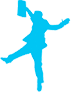

In [19]:
industry_url="https://www.vietnamworks.com/tim-viec-lam"

page = requests.get(industry_url)

soup = BeautifulSoup(page.text, 'html.parser')

soup.prettify()

In [20]:
industries = soup.find("div", class_="highlight").find_all("dd")

import pandas as pd

full_ind = []
full_no_of_job = []
for industry in industries:
  tmp = industry.get_text().split()
  no_of_jobs=str(tmp[-1])[1:-1]
  tmp = tmp[0:-1]
  ind = " ".join(tmp)
  full_ind.append(ind)
  full_no_of_job.append(no_of_jobs)


In [21]:
from pandas import DataFrame

demo = {'Industry': full_ind,
        'No. of Jobs': full_no_of_job
        }

df = DataFrame(demo, columns= ['Industry', 'No. of Jobs'])

print (df)

                            Industry No. of Jobs
0                           Xây dựng         872
1        Kiến trúc/Thiết kế nội thất         487
2                       Bất động sản         416
3                         Viễn Thông         167
4   Truyền hình/Truyền thông/Báo chí         245
5       Mỹ Thuật/Nghệ Thuật/Thiết Kế         439
6     Quảng cáo/Khuyến mãi/Đối ngoại         676
7              Internet/Online Media         598
8                    In ấn/ Xuất bản          74
9                          Ngân hàng         814
10                         Kiểm toán         751
11                  Tài chính/Đầu tư        1522
12                       Chứng khoán         137
13                          Bảo hiểm         218
14                    Hàng tiêu dùng         348
15                     Hàng gia dụng          73
16                     Bán lẻ/Bán sỉ         468
17               Thực phẩm & Đồ uống         319
18                        Thời trang         132
19                  

In [22]:
industries = soup.find_all("div", class_="highlight")[2].find_all("dd")

import pandas as pd

full_ind = []
full_no_of_job = []
for industry in industries:
  tmp = industry.get_text().split()
  no_of_jobs=str(tmp[-1])[1:-1]
  tmp = tmp[0:-1]
  ind = " ".join(tmp)
  full_ind.append(ind)
  full_no_of_job.append(no_of_jobs)

demo = {'Senority': full_ind,
        'No. of Jobs': full_no_of_job
        }

df = DataFrame(demo, columns= ['Senority', 'No. of Jobs'])

# moi tot nghiep -> junior
# Cap quan ly dieu hanh -> manager / director

print (df)

                     Senority No. of Jobs
0              Mới tốt nghiệp         165
1       Cấp quản lý điều hành         637
2   Thời vụ/Hợp đồng ngắn hạn          15
3               Overseas Jobs          29
4  Người nước ngoài/Việt Kiều          32


In [23]:
df.to_csv("Vietnamworks.csv")